<a href="https://colab.research.google.com/github/RisyadFaisalH/Fuzzy-Logic/blob/main/TUBES_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>MAIN ASSIGNMENT 2</h1>

<h3>group member: </h3>


> Rizqi Khoir Y (1301194266)

> Risyad Faisal Hadi (130119423)



<p><b>Soal </b>: http://bit.ly/SoalAIAss2</p>
<p><b>Dataset </b>: http://bit.ly/datasetRestaurant</p>



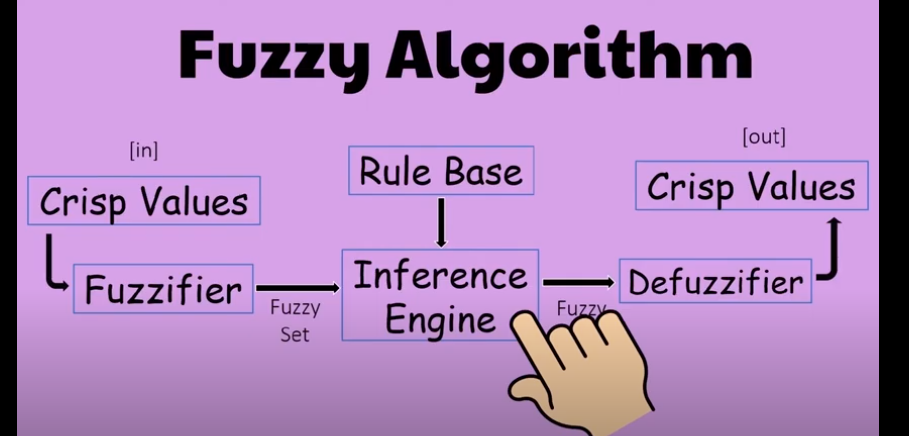

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as matplt

**IMPORTING DATASET**

In [ ]:
data = pd.read_csv("http://bit.ly/datasetRestaurant")
print("Dataset:\n", data)

Dataset:
      id  pelayanan  makanan
0     1         58        7
1     2         54        1
2     3         98        2
3     4         52        4
4     5         11        4
..  ...        ...      ...
95   96         30        1
96   97         25        3
97   98         27       10
98   99          8        6
99  100         11        8

[100 rows x 3 columns]


**INPUT LINGUISTIC**

**A. Services**
- 20 and 40 = Bad
- 30, 40, 60, 70 = Average
- 65 and 90 = Good

**B. Food**
- 2 and 3.5 = Nah
- 3, 4, 6, 7 = Normal
- 6 and 8 = Delicious

**OUTPUT LINGUISTIC**]
- Not Recommended
- Considered
- Recommended



**MEMBERSHIP FUNCTION**

In [ ]:
def maximum(x, a, b):
  if a < x and x <= b:
    return (x - a) / (b - a)
  if x <= a:
    return 0
  return 1
 
def minimum(x, a, b):
  if a < x and x <= b:
    return (b - x) / (b - a)
  if x <= a:
    return 1
  return 0
 
def average(x, a, b, c, d):
  if x <= a or x > d:
    return 0
  if a < x and x < b:
    return (x - a) / (b - a)
  if c < x and x <= d:
    return (d - x) / (d - c)
  return 1
 
services_rule = {"sMin" : [40, 50], "sAvg" : [45, 55, 70, 80], "sMax" : [75, 90]}
foods_rule = {"fMin" : [4, 5.5], "fAvg" : [5, 6, 7, 8.5], "fMax" : [8, 9]}

**DIAGRAM FOR SERVICE AND FOOD QUALITY**

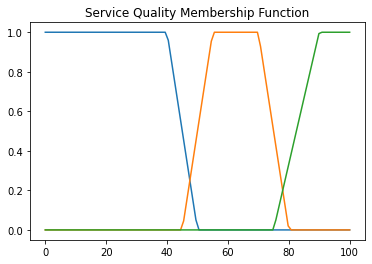

In [ ]:
s_x = np.linspace(0, 100, 100)
matplt.plot(s_x, [minimum(x, services_rule["sMin"][0], services_rule["sMin"][1]) for x in s_x])
matplt.plot(s_x, [average(x, services_rule["sAvg"][0], services_rule["sAvg"][1], services_rule["sAvg"][2], services_rule["sAvg"][3]) for x in s_x])
matplt.plot(s_x, [maximum(x, services_rule["sMax"][0], services_rule["sMax"][1]) for x in s_x])
matplt.title("Service Quality Membership Function")
matplt.show()

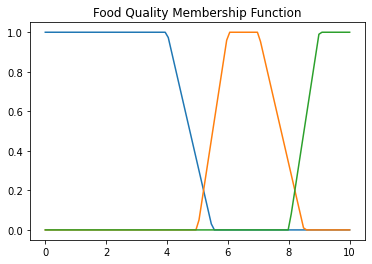

In [ ]:
f_x = np.linspace(0, 10, 100)
matplt.plot(f_x, [minimum(x, foods_rule["fMin"][0], foods_rule["fMin"][1]) for x in f_x])
matplt.plot(f_x, [average(x, foods_rule["fAvg"][0], foods_rule["fAvg"][1], foods_rule["fAvg"][2], foods_rule["fAvg"][3]) for x in f_x])
matplt.plot(f_x, [maximum(x, foods_rule["fMax"][0], foods_rule["fMax"][1]) for x in f_x])
matplt.title("Food Quality Membership Function")
matplt.show()

**FUZZIFICATION**

In [ ]:
fuzzyness = []

for service, food in zip(data["pelayanan"], data["makanan"]):
	fuzzyness.append([
		{
			"ctg" 	:	"Recommended", 
			"score" :	min(maximum(service, services_rule["sMax"][0], services_rule["sMax"][1]), maximum(food, foods_rule["fMax"][0], foods_rule["fMax"][1]))
		},
		{
			"ctg"	:	"Recommended",
			"score"	:	min(maximum(service, services_rule["sMax"][0], services_rule["sMax"][1]), average(food, foods_rule["fAvg"][0], foods_rule["fAvg"][1], foods_rule["fAvg"][2], foods_rule["fAvg"][3]))
		},
		{
			"ctg"	:	"Not_Recommended",
			"score"	:	min(maximum(service, services_rule["sMax"][0], services_rule["sMax"][1]), minimum(food, foods_rule["fMin"][0], foods_rule["fMin"][1]))
		},
		{
			"ctg"	:	"Recommended",
			"score"	:	min(average(service, services_rule["sAvg"][0], services_rule["sAvg"][1], services_rule["sAvg"][2], services_rule["sAvg"][3]), maximum(food, foods_rule["fMax"][0], foods_rule["fMax"][1]))
		},
		{	
			"ctg"	:	"Considered",
			"score"	:	min(average(service, services_rule["sAvg"][0], services_rule["sAvg"][1], services_rule["sAvg"][2], services_rule["sAvg"][3]), average(food, foods_rule["fAvg"][0], foods_rule["fAvg"][1], foods_rule["fAvg"][2], foods_rule["fAvg"][3]))
		},
		{
			"ctg"	:	"Not_Recommended",
			"score"	:	min(average(service, services_rule["sAvg"][0], services_rule["sAvg"][1], services_rule["sAvg"][2], services_rule["sAvg"][3]), minimum(food, foods_rule["fMin"][0], foods_rule["fMin"][1]))
		},
		{
			"ctg"	:	"Considered",
			"score"	:	min(minimum(service, services_rule["sMin"][0], services_rule["sMin"][1]), maximum(food, foods_rule["fMax"][0], foods_rule["fMax"][1]))
		},
		{
			"ctg"	:	"Not_Recommended",
			"score"	:	min(minimum(service, services_rule["sMin"][0], services_rule["sMin"][1]), average(food, foods_rule["fAvg"][0], foods_rule["fAvg"][1], foods_rule["fAvg"][2], foods_rule["fAvg"][3]))
		},
		{
			"ctg"	:	"Not_Recommended",
			"score"	:	min(minimum(service, services_rule["sMin"][0], services_rule["sMin"][1]), minimum(food, foods_rule["fMin"][0], foods_rule["fMin"][1]))
		}
	 ])

 **Design fuzzy rule**

|Good      |   Delicious   |   Recommended|
| :--      |     :--:      |           --:|
|Good      |   Normal      |   Recommended|
|Good      |   Nah          |   Not Recommended|
|Avarage   |   Delicious   |   Recommended|
|Avarage   |   Normal      |   Considered |
|Avarage   |   Nah         |   Not Recommended |
|Bad       |   Delicious   |   Considered |
|Bad       |   Normal      |   Not Recommended|
|Bad       |   Nah         |   Not Recommended


**INFERENCE**

In [ ]:
score = []

for i in fuzzyness:
	max_recommended 	= 0
	max_considered 		= 0
	max_not_recommended = 0
	for j in i:
		if j["ctg"] == "Recommended":
			max_recommended = max(max_recommended, j["score"])
		elif j["ctg"] == "Considered":
			max_considered = max(max_considered, j["score"])
		else:
			max_not_recommended = max(max_not_recommended, j["score"])

	score.append({"Recommended" : max_recommended, "Considered" : max_considered, "Not_Recommended" : max_not_recommended})

**DEFUZZIFICATION**

In [ ]:
def defuzzy(data):
	return ((data["Recommended"] * 100) + (data["Considered"] * 70) + (data["Not_Recommended"] * 50)) / (data["Recommended"] + data["Considered"] + data["Not_Recommended"])

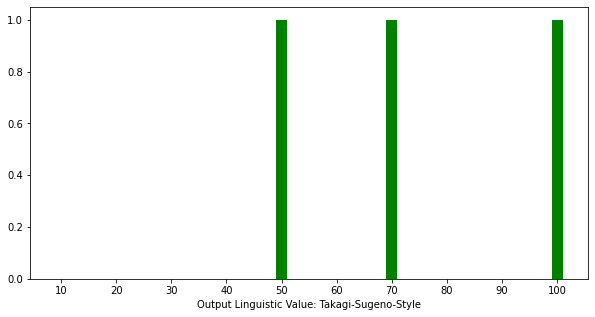

From left to right: Not Recommended, Average, Recommended


In [ ]:
data_2 = {'10':0, '20':0, '30':0, '40':0, '50':1, '60':0, '70':1, '80':0, '90':0, '100':1,}
courses = list(data_2.keys())
values = list(data_2.values())
  
fig = matplt.figure(figsize = (10, 5))
 
# creating the bar plot
matplt.bar(courses, values, color ='green',
        width = 0.2)
 
matplt.xlabel("Output Linguistic Value: Takagi-Sugeno-Style")
matplt.show()
print("From left to right: Not Recommended, Average, Recommended")

**MAIN PROGRAM**

In [ ]:
dd = [] 
for i in score:
	dd.append(defuzzy(i))

data_final = data
data_final["score"] = dd

print("Top 10 restaurant")
data_final = data_final.sort_values(by=["score"])
print(data_final[100:90:-1])

#export to excel
data_final = data_final.drop(["pelayanan", "makanan", "score"], axis=1)
data_final[100:90:-1].to_excel("peringkat.xls", index=False, header=False)

Top 10 restaurant
    id  pelayanan  makanan  score
78  79         87        9  100.0
21  22         79        9  100.0
5    6         59       10  100.0
53  54         64       10  100.0
24  25         61       10  100.0
15  16         82        6  100.0
68  69         86       10  100.0
23  24        100        9  100.0
41  42         94       10  100.0
